# Figures in software paper.

This notebook produce the maps in in Fig. 1 in the meta paper$^1$. This is to give yet one more example of the use of the agrid code. 

---
1. At least similar figures, the actual paper is generated by a SCons script. This notebook might not be updated. 

In [ ]:
%gui qt

In [ ]:
import sys
sys.path.append('..')

from agrid.agrid import *
ant = Grid(crs=3031, res = [10*km, 10*km], left = -3100*km, up=3100*km, right = 3100*km, down = -3100*km)

In [ ]:
#Download datasets
from agrid.acc import download
bedmap_url = 'https://secure.antarctica.ac.uk/data/bedmap2/bedmap2_tiff.zip'
bedmap_path = '../local/bedmap2_tiff'
download(bedmap_url, bedmap_path + '.zip')

for shape_ending in ['.shp','.shx','.prj', '.dbf', '.qix']:
    GSFC_url = '''http://quantarctica.tpac.org.au/Quantarctica3/
                Glaciology/GSFC%20Drainage/GSFC_DrainageSystems'''
    GSFC_file = '../local/GSFC/GSFC_DrainageSystems'
    download(GSFC_url+ shape_ending, GSFC_file + shape_ending)

In [ ]:
# Import raster files
for data_set, label in zip(['thickness', 'bed'], ['ICE', 'DEM']):
    ant.ds[label] = (('Y', 'X'), 
        ant.read_raster('%s/bedmap2_%s.tif' %(bedmap_path, data_set), 
            no_data = 32767.) )

For this vector set, the attribute value ('ID') is not a number but a string. `map_to_int` is default True and assigns a numerical value to each class. `return_map` returns dictionary of values. 

In [ ]:
#Import polygons
drainage = ant.assign_shape(GSFC_file + '.shp','ID')
ant.ds['DRAINAGE'] = (('Y', 'X'), drainage)

We can select a few polygons to use as classifier: 

In [ ]:
# Select a few polygons: 
ant.ds['SEL_ICE'] = ant.ds['ICE']*ant.ds['DRAINAGE'].isin(list(range(0, 53//2)))

In [ ]:
# Make some 3D data
ant.ds['RANDOM'] = (('Y', 'X', 'Z'), 
                np.random.rand(*ant.shape3))


We can do some calculations: 

In [ ]:
print(int(ant.ds['EAST_ICE'].sum()*np.prod(ant.res)/km**3),'km3')

In [ ]:
ant.oblique_view('DEM', 
    save_name = 'oblique.png',
    vmin= -2000, vmax=4000, 
    cmap='bone',
    distance=1300,
    azimuth=180,
    roll=-90)

! open oblique.png

File ../local/bedmap2_tiff.zip already exists.
Saved:  ../local/bedmap2_tiff.zip
File ../local/GSFC/GSFC_DrainageSystems.shp already exists.
Saved:  ../local/GSFC/GSFC_DrainageSystems.shp
File ../local/GSFC/GSFC_DrainageSystems.shx already exists.
Saved:  ../local/GSFC/GSFC_DrainageSystems.shx
File ../local/GSFC/GSFC_DrainageSystems.prj already exists.
Saved:  ../local/GSFC/GSFC_DrainageSystems.prj
File ../local/GSFC/GSFC_DrainageSystems.dbf already exists.
Saved:  ../local/GSFC/GSFC_DrainageSystems.dbf
File ../local/GSFC/GSFC_DrainageSystems.qix already exists.
Saved:  ../local/GSFC/GSFC_DrainageSystems.qix
{'10f': 1, '10g': 2, '11f': 3, '11g': 4, '12f': 5, '12g': 6, '13f': 7, '13g': 8, '14f': 9, '14g': 10, '15f': 11, '15g': 12, '16f': 13, '16g': 14, '17f': 15, '17g': 16, '18f': 17, '18g': 18, '19f': 19, '19g': 20, '1f': 21, '1g': 22, '20f': 23, '20g': 24, '21f': 25, '21g': 26, '22f': 27, '22g': 28, '23f': 29, '23g': 30, '24f': 31, '24g': 32, '25f': 33, '25g': 34, '26f': 35, '26g': 36

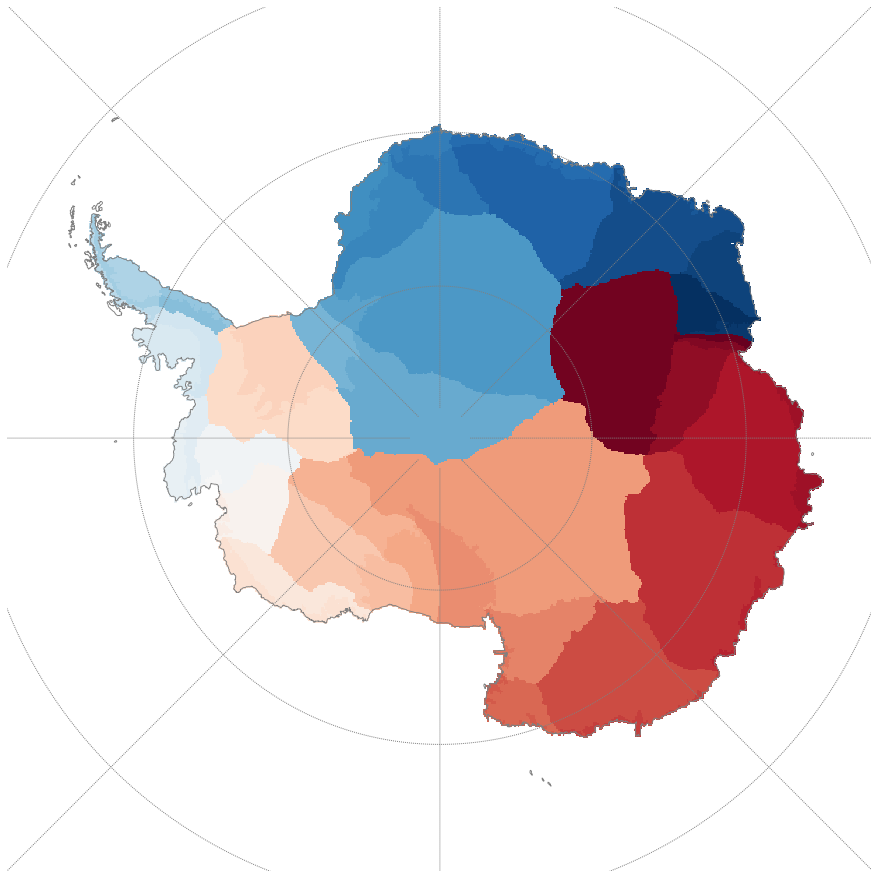

Saved to: selected.pdf


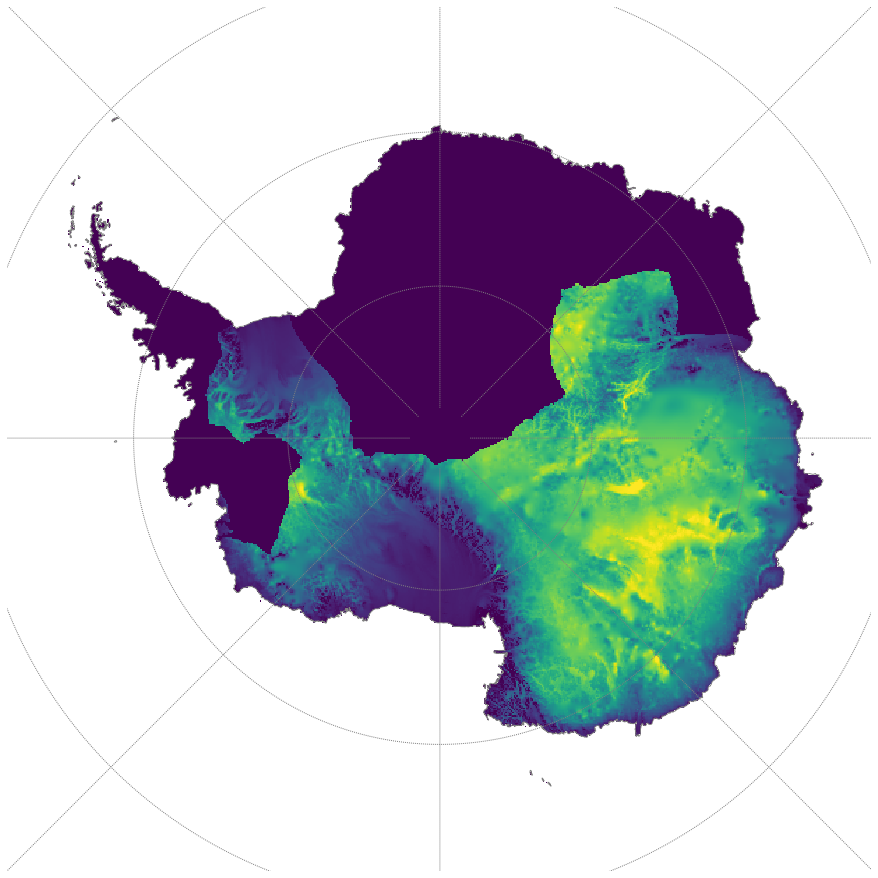

In [12]:
#Make maps
ant.map_grid('DRAINAGE', 
    cmap='RdBu', 
    save_name= 'drainage.pdf')

ant.map_grid('SEL_ICE', 
    cmap = 'viridis', 
    save_name = 'selected.pdf')

#FIG 2C
#ant.map_grid('SEL_ICE', 
#    cmap = 'viridis', 
#    save_name = 'selected.pdf')


ant.oblique_view('DEM', 
    vmin= 0, vmax = 4200, 
    cmap = 'bone',
    azimuth = 180, roll = -90,
    save_name = 'oblique_view.pdf')

#Analyse. E.g:
vol = int(ant.ds['SEL_ICE'].sum()*np.prod(ant.res)/km**3)

In [ ]:
print(vol)

16551739